In [2]:
# Nelson–Siegel–Svensson (NSS) — ready to paste in VS Code
# - Computes zero-coupon yields zcy_NSS(T)
# - (Optional) computes instantaneous forward f_NSS(T) per your notes (Eq. 2.6)
# - Plots in a separate "cell" (use VS Code Jupyter / Python Interactive: #%%)

import numpy as np

def zcy_nss(T, a, b, c, d, tau, theta, eps=1e-8):
    """
    Zero-coupon yield curve under Nelson–Siegel–Svensson (NSS) as in your notes (Eq. 2.5).

    Parameters
    ----------
    T : float or array-like
        Maturity in years (>=0).
    a, b, c, d : float
        NSS coefficients (level, slope, curvature1, curvature2).
    tau, theta : float
        Decay / hump location parameters (must be > 0).
    eps : float
        Small number to avoid division by zero near T=0.

    Returns
    -------
    y : float or np.ndarray
        Zero-coupon yield(s).
    """
    if tau <= 0 or theta <= 0:
        raise ValueError("tau and theta must be strictly positive.")

    T_arr = np.asarray(T, dtype=float)
    T_safe = np.maximum(T_arr, eps)

    x1 = T_safe / tau
    x2 = T_safe / theta

    # Helper terms
    term1 = (1.0 - np.exp(-x1)) / x1
    term2 = term1 - np.exp(-x1)
    term3 = (1.0 - np.exp(-x2)) / x2 - np.exp(-x2)

    y = a + b * term1 + c * term2 + d * term3

    # Return scalar if scalar input
    if np.isscalar(T):
        return float(y)
    return y


def fwd_nss(T, a, b, c, d, tau, theta, eps=1e-8):
    """
    Instantaneous forward rate under NSS (as given in your notes Eq. 2.6).

    NOTE: This is included because it may appear on quizzes.
    If your course uses a slightly different forward formula, adjust here to match the notes exactly.

    Returns f_NSS(T).
    """
    if tau <= 0 or theta <= 0:
        raise ValueError("tau and theta must be strictly positive.")

    T_arr = np.asarray(T, dtype=float)
    T_safe = np.maximum(T_arr, eps)

    part1 = (np.exp(-T_safe / tau) / tau) * (b * tau + c * T_safe)
    part2 = (np.exp(-T_safe / theta) / theta) * (d * T_safe)

    f = a + part1 + part2

    if np.isscalar(T):
        return float(f)
    return f


def discount_factor(T, a, b, c, d, tau, theta, comp="cont"):
    """
    Discount factor from NSS zero yields.
    comp="cont" (continuous compounding): P(0,T) = exp(-y(T)*T)
    If your course uses annual compounding, tell me and I’ll adapt.
    """
    y = zcy_nss(T, a, b, c, d, tau, theta)
    T_arr = np.asarray(T, dtype=float)
    if comp == "cont":
        P = np.exp(-np.asarray(y) * T_arr)
    else:
        raise ValueError("Only comp='cont' is implemented.")
    if np.isscalar(T):
        return float(P)
    return P


if __name__ == "__main__":
    # Example parameters (replace with values given in your quiz)
    a = 0.040
    b = -0.020
    c = 0.015
    d = 0.005
    tau = 1.5
    theta = 6.0

    # Example single maturity calculation
    T0 = 3.0
    y_T0 = zcy_nss(T0, a, b, c, d, tau, theta)
    print(f"zcy_NSS({T0:.2f}y) = {y_T0:.6f}")

    # Example vector calculation
    T_vec = np.array([0.25, 0.5, 1, 2, 5, 10, 30], dtype=float)
    y_vec = zcy_nss(T_vec, a, b, c, d, tau, theta)
    print("Maturities:", T_vec)
    print("zcy_NSS   :", np.round(y_vec, 6))


zcy_NSS(3.00y) = 0.036710
Maturities: [ 0.25  0.5   1.    2.    5.   10.   30.  ]
zcy_NSS   : [0.022799 0.025197 0.029023 0.033954 0.039238 0.040721 0.04071 ]


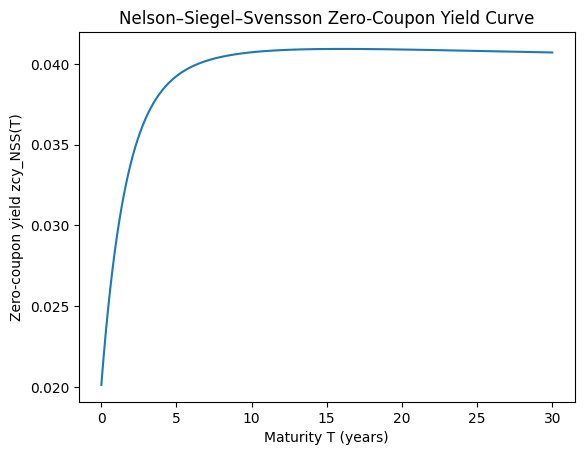

In [3]:
#%% Plot cell (separate cell in VS Code / Jupyter)
import numpy as np
import matplotlib.pyplot as plt

# Reuse the same parameters as above (or redefine here if needed)
a = 0.040
b = -0.020
c = 0.015
d = 0.005
tau = 1.5
theta = 6.0

T_grid = np.linspace(0.01, 30.0, 400)
y_grid = zcy_nss(T_grid, a, b, c, d, tau, theta)

plt.figure()
plt.plot(T_grid, y_grid)
plt.xlabel("Maturity T (years)")
plt.ylabel("Zero-coupon yield zcy_NSS(T)")
plt.title("Nelson–Siegel–Svensson Zero-Coupon Yield Curve")
plt.show()
